# Naive Bayesian Classifier on vote dataset for Classification

### Importing the required libraries

In [82]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes

### Importing the dataset

In [83]:
df = pd.read_csv('E:/Bhavani/Bhavani/Subjects/DWDM/WEKA LAB DATASET/vote_csv.csv')

### Exploratory Data Analysis

In [84]:
df.shape

(435, 17)

### viewing top 5 rows of the dataset

In [85]:
df.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN,republican
2,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y,democrat


### Viewing summary of dataset

In [86]:
df.info() # All the attributes are of categorical type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
handicapped-infants                       423 non-null object
water-project-cost-sharing                387 non-null object
adoption-of-the-budget-resolution         424 non-null object
physician-fee-freeze                      424 non-null object
el-salvador-aid                           420 non-null object
religious-groups-in-schools               424 non-null object
anti-satellite-test-ban                   421 non-null object
aid-to-nicaraguan-contras                 420 non-null object
mx-missile                                413 non-null object
immigration                               428 non-null object
synfuels-corporation-cutback              414 non-null object
education-spending                        404 non-null object
superfund-right-to-sue                    410 non-null object
crime                                     418 non-null object
duty-free-exports          

### Checking for missing values

In [87]:
df.isnull()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
431,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
432,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
433,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False


### The above method gives which values are missing

### If we want to get count of missing values in each column

In [88]:
df.isnull().sum()

handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
Class                                       0
dtype: int64

In [89]:
# Checking the number of missing values and arranging in descending order
df.isnull().sum().sort_values(ascending = False)

export-administration-act-south-africa    104
water-project-cost-sharing                 48
education-spending                         31
duty-free-exports                          28
superfund-right-to-sue                     25
mx-missile                                 22
synfuels-corporation-cutback               21
crime                                      17
el-salvador-aid                            15
aid-to-nicaraguan-contras                  15
anti-satellite-test-ban                    14
handicapped-infants                        12
religious-groups-in-schools                11
physician-fee-freeze                       11
adoption-of-the-budget-resolution          11
immigration                                 7
Class                                       0
dtype: int64

In [90]:
# Checking the percentage of missing values and arranging in descending order
df.isnull().sum().sort_values(ascending = False) * 100 / len(df)

export-administration-act-south-africa    23.908046
water-project-cost-sharing                11.034483
education-spending                         7.126437
duty-free-exports                          6.436782
superfund-right-to-sue                     5.747126
mx-missile                                 5.057471
synfuels-corporation-cutback               4.827586
crime                                      3.908046
el-salvador-aid                            3.448276
aid-to-nicaraguan-contras                  3.448276
anti-satellite-test-ban                    3.218391
handicapped-infants                        2.758621
religious-groups-in-schools                2.528736
physician-fee-freeze                       2.528736
adoption-of-the-budget-resolution          2.528736
immigration                                1.609195
Class                                      0.000000
dtype: float64

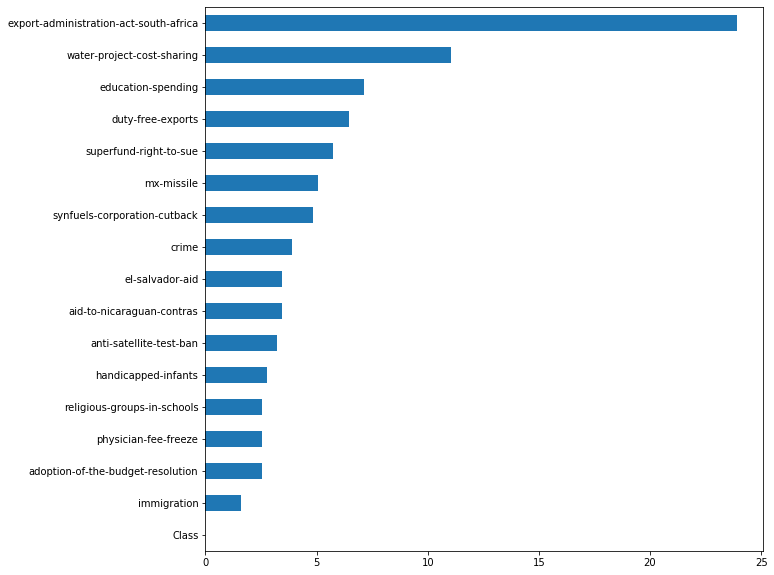

In [91]:
# Plotting the missing values
plt.figure(figsize = (10,10))
(df.isnull().sum().sort_values(ascending = True) * 100 / len(df)).plot(kind = 'barh')


In [92]:
# A list with column names
cols = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid','religious-groups-in-schools'
             ,'anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback',
             'education-spending','superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa',
            ]

In [93]:
# Extracting all independent featrures into x

x_df = df.iloc[:,0:-1]
x_df

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,n,NaN,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,n,n,n,y,y,y,NaN,NaN,NaN,NaN,n,y,y,y,n,y


In [94]:
# Extracting dependent featrure into y
y_df = df.iloc[:,-1]
y_df

0      republican
1      republican
2        democrat
3        democrat
4        democrat
          ...    
430    republican
431      democrat
432    republican
433    republican
434    republican
Name: Class, Length: 435, dtype: object

In [95]:
# Imputing missing values for Categorical features
from sklearn.impute import SimpleImputer
# Defining numerical imputer
my_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# Imputing on all categorical data
x_df[cols] = my_imputer.fit_transform(x_df[cols])
x_df[cols].head()

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
2,n,y,y,n,y,y,n,n,n,n,y,n,y,y,n,n
3,n,y,y,n,y,y,n,n,n,n,y,n,y,n,n,y
4,y,y,y,n,y,y,n,n,n,n,y,n,y,y,y,y


In [96]:
# Encoding using LabelEncoder for categorical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_df['handicapped-infants'] = le.fit_transform(x_df['handicapped-infants'])
x_df['water-project-cost-sharing'] = le.fit_transform(x_df['water-project-cost-sharing'])
x_df['adoption-of-the-budget-resolution'] = le.fit_transform(x_df['adoption-of-the-budget-resolution'])
x_df['physician-fee-freeze'] = le.fit_transform(x_df['physician-fee-freeze'])
x_df['el-salvador-aid'] = le.fit_transform(x_df['el-salvador-aid'])
x_df['religious-groups-in-schools'] = le.fit_transform(x_df['religious-groups-in-schools'])
x_df['anti-satellite-test-ban'] = le.fit_transform(x_df['anti-satellite-test-ban'])
x_df['aid-to-nicaraguan-contras'] = le.fit_transform(x_df['aid-to-nicaraguan-contras'])
x_df['mx-missile'] = le.fit_transform(x_df['mx-missile'])
x_df['immigration'] = le.fit_transform(x_df['immigration'])
x_df['synfuels-corporation-cutback'] = le.fit_transform(x_df['synfuels-corporation-cutback'])
x_df['education-spending'] = le.fit_transform(x_df['education-spending'])
x_df['superfund-right-to-sue'] = le.fit_transform(x_df['superfund-right-to-sue'])
x_df['crime'] = le.fit_transform(x_df['crime'])
x_df['duty-free-exports'] = le.fit_transform(x_df['duty-free-exports'])
x_df['export-administration-act-south-africa'] = le.fit_transform(x_df['export-administration-act-south-africa'])


C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [97]:
# Checking the data
x_df.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [98]:
# Splitting the data as train and test data (8:2 ratio)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_df, y_df, test_size = 0.20, random_state = 0)

In [99]:
# Training the Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [100]:
# Testing the classiifier
y_pred  =  classifier.predict(X_test)

In [101]:
y_pred

array(['democrat', 'democrat', 'democrat', 'democrat', 'democrat',
       'democrat', 'democrat', 'republican', 'democrat', 'republican',
       'republican', 'democrat', 'democrat', 'republican', 'republican',
       'republican', 'republican', 'democrat', 'democrat', 'republican',
       'democrat', 'democrat', 'republican', 'democrat', 'democrat',
       'democrat', 'republican', 'democrat', 'republican', 'democrat',
       'republican', 'democrat', 'democrat', 'democrat', 'republican',
       'democrat', 'republican', 'republican', 'democrat', 'democrat',
       'republican', 'democrat', 'democrat', 'democrat', 'republican',
       'republican', 'democrat', 'democrat', 'republican', 'democrat',
       'republican', 'democrat', 'democrat', 'democrat', 'republican',
       'democrat', 'republican', 'democrat', 'democrat', 'republican',
       'democrat', 'democrat', 'republican', 'democrat', 'democrat',
       'republican', 'republican', 'democrat', 'republican', 'republican',
      

In [102]:
# Printing the confusion matrix

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, y_pred)
cm

array([[48,  4],
       [ 3, 32]], dtype=int64)

In [103]:
# Calculating the accuracy

ac = accuracy_score(Y_test,y_pred)
ac

0.9195402298850575

In [104]:
# Calculating the metrics

from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(Y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
    

precision: [0.94117647 0.88888889]
recall: [0.92307692 0.91428571]
fscore: [0.93203883 0.90140845]
support: [52 35]


#                                           ------ Happy Exploring------